In [11]:
%load_ext autoreload
%autoreload 2
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent.parent))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 40.4 ms (started: 2023-06-01 19:30:22 -04:00)


In [12]:
%reload_ext dotenv

%dotenv ../../env/.env

import warnings
from pandas import Timedelta
# from optiml.utils import sf
import time
from optiml.utils.sf import logger, sql_to_df, run_sql, conn, session
import pandas as pd
warnings.filterwarnings('ignore')

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 37.1 ms (started: 2023-06-01 19:30:23 -04:00)


In [32]:
wh_name = 'test_bc9a9691_c770_4eb7_96e9_278aac7db0c6'

time: 2.2 ms (started: 2023-06-01 19:48:26 -04:00)


In [14]:
# Q1: if Cluster 1 and 3 are active, 2 is idle, and num_clusters is set to 2, does #2 shutoff?
#    1b) are credits saved?
# Q2: if cluster 1 and 2 are active, and 2 is shutoff before 60 seconds of uptime, are we billed
#     at minimum of 60 secs like base warehouse cluster? or charged for usage?
#     - yes, minimum of 60 secs billed

# algos:
# 1) if warehouse is idle, shut down warehouse
# 2) estimate total number of active clusters
#   a) use total number of running queries
#   b) use total pct of provisioned 
# set max_clusters to that number of active clusters
# 3) if multicluster type is STANDARD and warehouse is idle set to ECONOMY
#    if not idle and total active clusters > 1 (or total active clusters = max clusters)
#        then set to ECONOMY

time: 605 µs (started: 2023-06-01 19:30:24 -04:00)


In [81]:
import time
def monitor():
    show_df = sql_to_df("show warehouses")
    now = pd.Timestamp.now()
    show_df['ts'] = now
    something_running = 'STARTED' in show_df.state.to_list()
    all_show_results = []
    all_show_results.append(show_df)
    
    while something_running:
        time.sleep(1)
        show_df = sql_to_df("show warehouses")
        now = pd.Timestamp.now()
        show_df['ts'] = now
        something_running = 'STARTED' in show_df.state.to_list()
        print(something_running)
        all_show_results.append(show_df)
    return pd.concat(all_show_results)
#     def show():
#         run_sql(f"USE WAREHOUSE {using_wh}", ctx=using_conn)
#         show_df = sql_to_df("show warehouses")

    
#     show()
    print(something_running)

df = monitor()
df

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


name       state      type     size  \
0                                        DEMO   SUSPENDED  STANDARD  X-Small   
1   TEST_1C01F24E_3523_47E8_97B2_1C3759C0ED0E   SUSPENDED  STANDARD  X-Small   
2   TEST_7C3C20FE_E606_4564_83A2_183CD150CADB   SUSPENDED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6     STARTED  STANDARD  X-Small   
0                                        DEMO   SUSPENDED  STANDARD  X-Small   
..                                        ...         ...       ...      ...   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6     STARTED  STANDARD  X-Small   
0                                        DEMO   SUSPENDED  STANDARD  X-Small   
1   TEST_1C01F24E_3523_47E8_97B2_1C3759C0ED0E   SUSPENDED  STANDARD  X-Small   
2   TEST_7C3C20FE_E606_4564_83A2_183CD150CADB   SUSPENDED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6  SUSPENDING  STANDARD  X-Small   

    min_cluster_count  max_cluster_count  started_clusters  running  queued  \
0                   1                  1                 0        0       0   
1                   1                  4                 0        0       0   
2                   1                  1                 0        0       0   
3                   1                  4                 1       10       0   
0                   1                  1                 0        0       0   
..                ...                ...               ...      ...     ...   
3                   1                  4                 3        0       0   
0                   1                  1                 0        0       0   
1                   1                  4                 0        0       0   
2                   1                  1                 0        0       0   
3                   1                  4                 0        0       0   

   is_default  ... enable_query_acceleration  \
0           N  ...                     false   
1           N  ...                     false   
2           N  ...                     false   
3           N  ...                     false   
0           N  ...                     false   
..        ...  ...                       ...   
3           N  ...                     false   
0           N  ...                     false   
1           N  ...                     false   
2           N  ...                     false   
3           N  ...                     false   

    query_acceleration_max_scale_factor resource_monitor actives pendings  \
0                                     8             null       0        0   
1                                     8             null       0        0   
2                                     8             null       0        0   
3                                     8             null       1        0   
0                                     8             null       0        0   
..                                  ...              ...     ...      ...   
3                                     8             null       3        0   
0                                     8             null       0        0   
1                                     8             null       0        0   
2                                     8             null       0        0   
3                                     8             null       0        0   

   failed suspended      uuid scaling_policy                         ts  
0       0         1  66221576       STANDARD 2023-06-02 00:34:03.129131  
1       0         1  66221656       STANDARD 2023-06-02 00:34:03.129131  
2       0         1  66221652       STANDARD 2023-06-02 00:34:03.129131  
3       0         0  66221660       STANDARD 2023-06-02 00:34:03.129131  
0       0         1  66221576       STANDARD 2023-06-02 00:34:04.250117  
..    ...       ...       ...            ...                        ...  
3       0         0  66221660       STANDARD 2023-06-02 00:38:59.585031  
0       0         1  66221576       S

time: 4min 57s (started: 2023-06-02 00:34:02 -04:00)


'test_bc9a9691_c770_4eb7_96e9_278aac7db0c6'

time: 2.19 ms (started: 2023-06-01 19:37:47 -04:00)


In [82]:
import pandas as pd
import datetime

current_time = datetime.datetime.now().strftime("%Y_%m%d_%H%M%S")
print(current_time)
# Assuming your DataFrame is called 'df'
df.to_pickle(f'{wh_name}_{current_time}.pkl')

2023_0602_004004
time: 7.76 ms (started: 2023-06-02 00:40:04 -04:00)


TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6


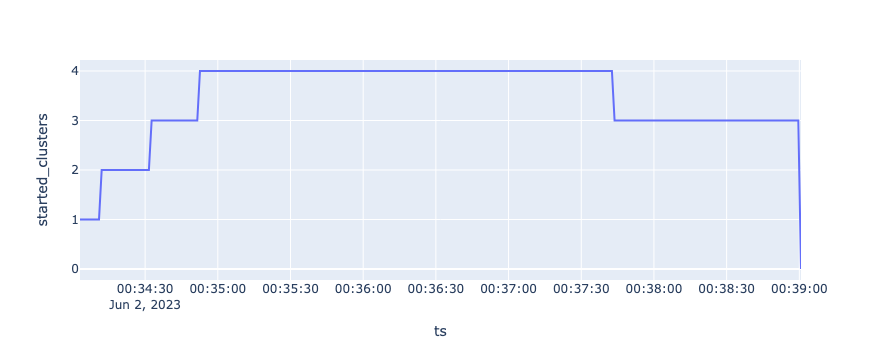

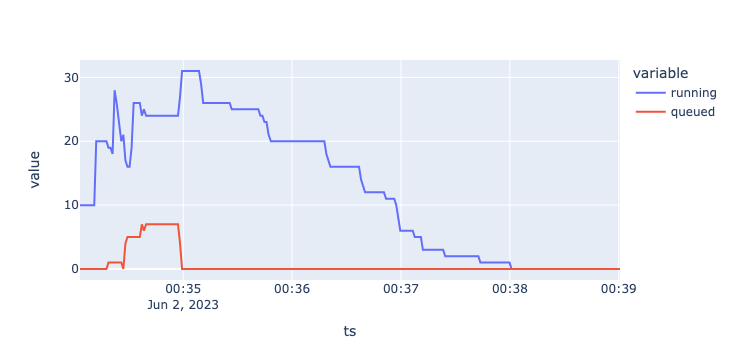

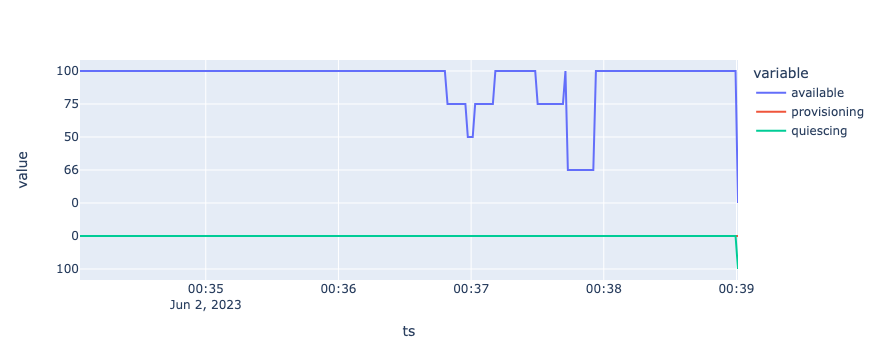

time: 190 ms (started: 2023-06-02 00:40:10 -04:00)


In [83]:
# wh_name='DEMO'
print(wh_name.upper())
import plotly.express as px
fig = px.line(df[df.name == wh_name.upper()], x='ts', y='started_clusters')
fig.show()
fig = px.line(df[df.name == wh_name.upper()], x='ts', y=['running', 'queued'])
fig.show()
fig = px.line(df[df.name == wh_name.upper()], x='ts', y=['available', 'provisioning', 'quiescing'])
fig.update_yaxes(autorange="reversed")

fig.show()

In [18]:
df[df.name == wh_name.upper()]

name      state      type     size  \
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
..                                        ...        ...       ...      ...   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6  SUSPENDED  STANDARD  X-Small   

    min_cluster_count  max_cluster_count  started_clusters  running  queued  \
3                   1                  4                 1       20       0   
3                   1                  4                 1       20       0   
3                   1                  4                 1       20       0   
3                   1                  4                 1       20       0   
3                   1                  4                 1       20       0   
..                ...                ...               ...      ...     ...   
3                   1                  4                 1        0       0   
3                   1                  4                 1        0       0   
3                   1                  4                 1        0       0   
3                   1                  4                 1        0       0   
3                   1                  4                 0        0       0   

   is_default  ... enable_query_acceleration  \
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
..        ...  ...                       ...   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   

    query_acceleration_max_scale_factor resource_monitor actives pendings  \
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       1        0   
..                                  ...              ...     ...      ...   
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       1        0   
3                                     8             null       0        0   

   failed suspended      uuid scaling_policy                         ts  
3       0         0  66221660       STANDARD 2023-05-30 15:20:42.459732  
3       0         0  66221660       STANDARD 2023-05-30 15:20:43.580431  
3       0         0  66221660       STANDARD 2023-05-30 15:20:44.694910  
3       0         0  66221660       STANDARD 2023-05-30 15:20:45.811006  
3       0         0  66221660       STANDARD 2023-05-30 15:20:46.964107  
..    ...       ...       ...            ...                        ...  
3       0         0  66221660       STANDARD 2023-05-30 15:22:29.020864  
3       0         0  66221660       STANDARD 2023

time: 22.4 ms (started: 2023-05-30 15:45:50 -04:00)


In [84]:
wh_status = """with qh as (
select 
    *,
    md5(warehouse_name) as warehouse_id,
      warehouse_name || ':' || cluster_number || ':' || query_id as warehouse_query,
    TIMESTAMPADD( millisecond , -execution_time,end_time) as execution_start_time
from table(information_schema.query_history_by_warehouse('test_bc9a9691_c770_4eb7_96e9_278aac7db0c6'))
where execution_status != 'RUNNING'
and warehouse_size is not null
order by start_time desc
limit 130
),
seconds as (
    select
        dateadd(
            'second',
            '-' || row_number() over (order by seq4() asc),
            dateadd('day', '+1', date_trunc('second', current_timestamp))
        ) as second_start,
        dateadd('second', '+1', second_start) as timestamp
    from table(generator(rowcount => (3600*24 * 100)))
    qualify second_start between (select min(start_time) from qh) and (select max(end_time) from qh)
),
warehouse_cluster_seconds as (
    select * from 
    seconds
    cross join 
    (select distinct md5(warehouse_name) as warehouse_id, warehouse_name, cluster_number from qh) w

)
-- select * from warehouse_seconds;
select
    seconds.timestamp,
    seconds.warehouse_name,
    seconds.warehouse_id,
    seconds.cluster_number,
    count(queries.query_id) as num_queries
from warehouse_cluster_seconds seconds
left join qh as queries
    -- on date_trunc('hour', seconds.timestamp)=queries.query_hour -- NEW: equi-join condition
    on seconds.warehouse_id = queries.warehouse_id
    and seconds.cluster_number = queries.cluster_number
    and seconds.timestamp -- range join condition
      between date_trunc('second', queries.execution_start_time) and date_trunc('second', queries.end_time)
group by 1,2,3,4
"""

wdf = sql_to_df(wh_status)
display(wdf)

timestamp                             warehouse_name  \
0     2023-06-01 21:37:40-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
1     2023-06-01 21:37:43-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
2     2023-06-01 21:35:01-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
3     2023-06-01 21:36:28-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
4     2023-06-01 21:36:22-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
...                         ...                                        ...   
71375 2023-06-01 16:46:40-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
71376 2023-06-01 16:46:27-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
71377 2023-06-01 16:46:27-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
71378 2023-06-01 16:46:13-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   
71379 2023-06-01 16:45:20-07:00  TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6   

                           warehouse_id cluster_number  num_queries  
0      e0ec9e0963e082f83baaad3273e3679d              1            2  
1      e0ec9e0963e082f83baaad3273e3679d              1            2  
2      e0ec9e0963e082f83baaad3273e3679d              1           10  
3      e0ec9e0963e082f83baaad3273e3679d              3            5  
4      e0ec9e0963e082f83baaad3273e3679d              3            5  
...                                 ...            ...          ...  
71375  e0ec9e0963e082f83baaad3273e3679d              4            0  
71376  e0ec9e0963e082f83baaad3273e3679d              3            0  
71377  e0ec9e0963e082f83baaad3273e3679d              1            0  
71378  e0ec9e0963e082f83baaad3273e3679d              4            0  
71379  e0ec9e0963e082f83baaad3273e3679d              1            0  

[71380 rows x 5 columns]

time: 3.74 s (started: 2023-06-02 00:40:31 -04:00)


In [77]:
import plotly.express as px
fig = px.area(wdf.sort_values(['timestamp', 'cluster_number']), x='timestamp_est', y=['num_queries'], color='cluster_number')
# fig.update_yaxes(autorange="reversed")

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['timestamp', 'warehouse_name', 'warehouse_id', 'cluster_number', 'num_queries'] but received: timestamp_est

time: 156 ms (started: 2023-06-02 00:30:30 -04:00)


In [48]:
[df.ts.min(), df.ts.max()]

[Timestamp('2023-06-01 19:40:38.780037'),
 Timestamp('2023-06-01 19:45:47.730851')]

time: 3.21 ms (started: 2023-06-01 20:13:43 -04:00)


TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6


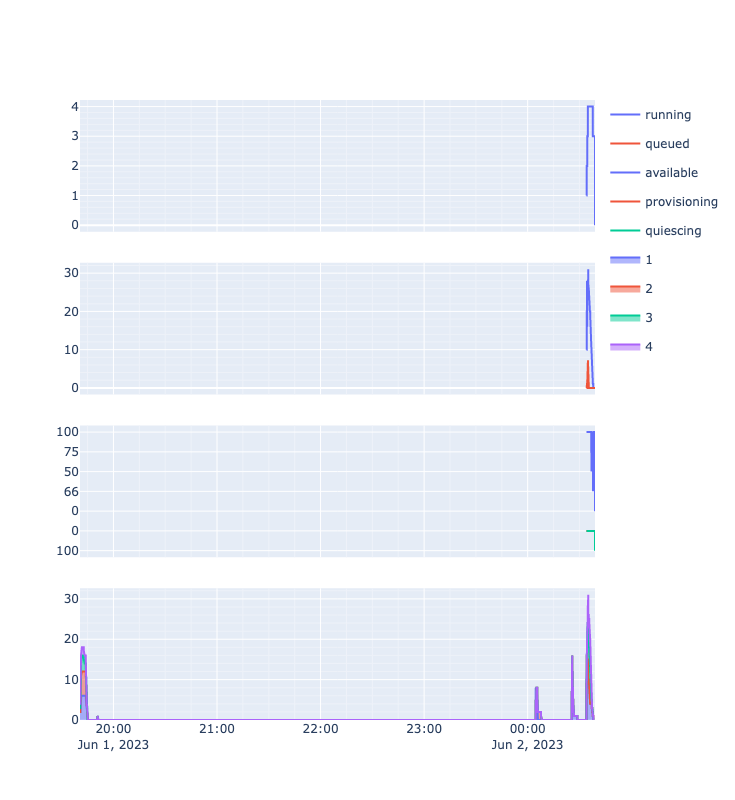

time: 2.93 s (started: 2023-06-02 00:40:35 -04:00)


In [85]:
from plotly.subplots import make_subplots

# qdf['warehouse_query'] = qdf.warehouse_name + " : " + qdf.query_id

wdf['timestamp_est'] = wdf.timestamp + pd.Timedelta(hours=3)

# wh_name='DEMO'
print(wh_name.upper())
import plotly.express as px
# fig = px.line(df[df.name == wh_name.upper()], x='ts', y='started_clusters')
# fig.show()
# fig = px.line(df[df.name == wh_name.upper()], x='ts', y=['running', 'queued'])
# fig.show()
# fig = px.line(df[df.name == wh_name.upper()], x='ts', y=['available', 'provisioning', 'quiescing'])
# fig.update_yaxes(autorange="reversed")

# fig.show()


figures = [
    px.line(df[df.name == wh_name.upper()], x='ts', y='started_clusters'),
    px.line(df[df.name == wh_name.upper()], x='ts', y=['running', 'queued']),
    px.line(df[df.name == wh_name.upper()], x='ts', y=['available', 'provisioning', 'quiescing']),
    px.area(wdf.sort_values(['timestamp_est', 'cluster_number']), x='timestamp_est', y=['num_queries'], color='cluster_number')
    ]

fig = make_subplots(rows=len(figures), cols=1, shared_xaxes=True, vertical_spacing=0.05) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)


fig.update_xaxes(showgrid=True,minor=dict(showgrid=True))
fig.update_yaxes(showgrid=True,minor=dict(showgrid=True))
fig.update_xaxes(autorange=True)

fig.update_xaxes(range=[df.ts.min(), df.ts.max()])
fig.update_layout(
    height=800,
)
fig.update_xaxes(type='date', autorange=True)
fig.update_yaxes(row=3, col=1, autorange='reversed')

# fig.update_layout(
#     xaxis_range=[cqe.era_start.min(), cqe.era_end.max()]  # Specify your desired minimum and maximum range
# )
fig.show()

# next: try just one layer of test query

In [66]:
df[df.name == wh_name.upper()]

name      state      type     size  \
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
..                                        ...        ...       ...      ...   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6    STARTED  STANDARD  X-Small   
3   TEST_BC9A9691_C770_4EB7_96E9_278AAC7DB0C6  SUSPENDED  STANDARD  X-Small   

    min_cluster_count  max_cluster_count  started_clusters  running  queued  \
3                   1                  4                 2       20       0   
3                   1                  4                 2       20       0   
3                   1                  4                 2       20       0   
3                   1                  4                 2       20       0   
3                   1                  4                 2       20       0   
..                ...                ...               ...      ...     ...   
3                   1                  4                 3        0       0   
3                   1                  4                 3        0       0   
3                   1                  4                 3        0       0   
3                   1                  4                 3        0       0   
3                   1                  4                 0        0       0   

   is_default  ... enable_query_acceleration  \
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
..        ...  ...                       ...   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   
3           N  ...                     false   

    query_acceleration_max_scale_factor resource_monitor actives pendings  \
3                                     8             null       2        0   
3                                     8             null       2        0   
3                                     8             null       2        0   
3                                     8             null       2        0   
3                                     8             null       2        0   
..                                  ...              ...     ...      ...   
3                                     8             null       3        0   
3                                     8             null       3        0   
3                                     8             null       3        0   
3                                     8             null       3        0   
3                                     8             null       0        0   

   failed suspended      uuid scaling_policy                         ts  
3       0         0  66221660       STANDARD 2023-06-01 19:40:38.780037  
3       0         0  66221660       STANDARD 2023-06-01 19:40:39.987930  
3       0         0  66221660       STANDARD 2023-06-01 19:40:41.571156  
3       0         0  66221660       STANDARD 2023-06-01 19:40:42.964246  
3       0         0  66221660       STANDARD 2023-06-01 19:40:44.087502  
..    ...       ...       ...            ...                        ...  
3       0         0  66221660       STANDARD 2023-06-01 19:45:43.179847  
3       0         0  66221660       STANDARD 2023

time: 19.5 ms (started: 2023-06-01 20:23:55 -04:00)
